### Comparing PCA and t-SNE using  scikit-learn
### Edgar Acuna
#### Dataset: MNIST
#### February 2020

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets.base import get_data_home 
print (get_data_home())

C:\Users\eacun\scikit_learn_data


In [13]:
import numpy as np
from sklearn.datasets import fetch_openml

#mnist = fetch_openml("MNIST original")
#X = mnist.data / 255.0
#y = mnist.target
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
#X_train, X_test = X[:60000], X[60000:]
#y_train, y_test = y[:60000], y[60000:]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [14]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [15]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

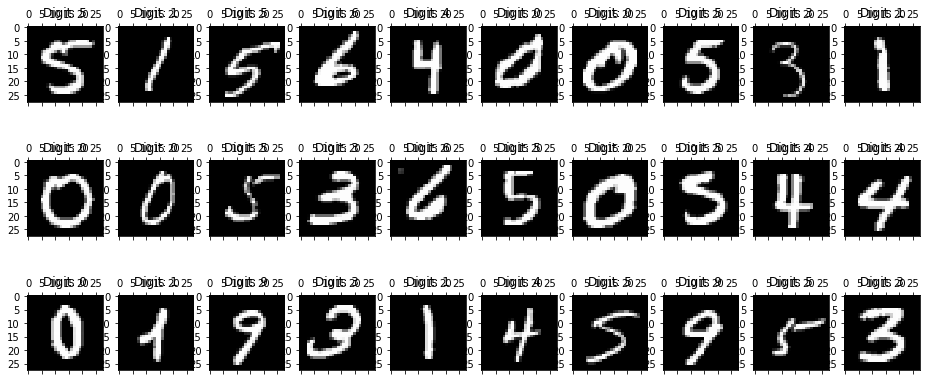

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


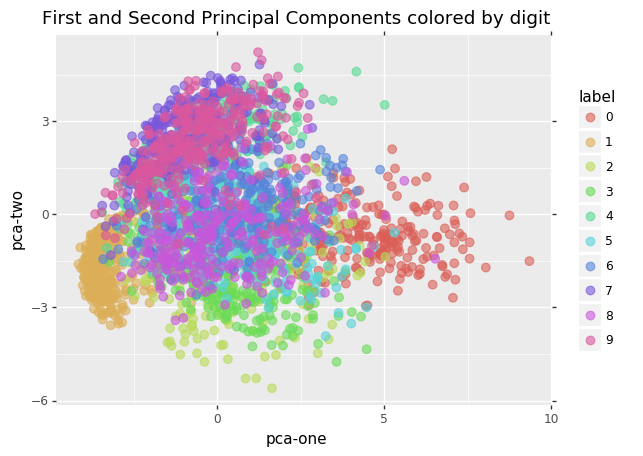

<ggplot: (100691670343)>

In [18]:
from plotnine import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [19]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.843s...
[t-SNE] Computed neighbors for 7000 samples in 142.837s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.207310
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.194649
[t-SNE] KL divergence after 300 iterations: 2.430858
t-SNE done! Time elapsed: 205.77318906784058 seconds


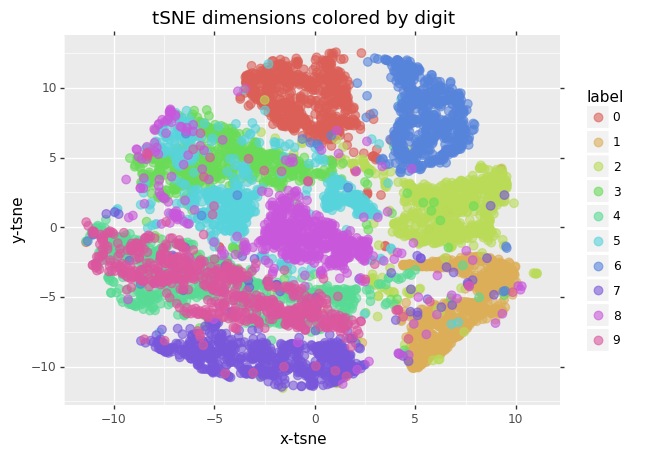

<ggplot: (-9223371936163105511)>

In [20]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [21]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8253925616771279


In [22]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50[rndperm[:n_sne]])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.052s...
[t-SNE] Computed neighbors for 10000 samples in 21.395s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.820118
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.398842
[t-SNE] KL divergence after 300 iterations: 2.784774
t-SNE done! Time elapsed

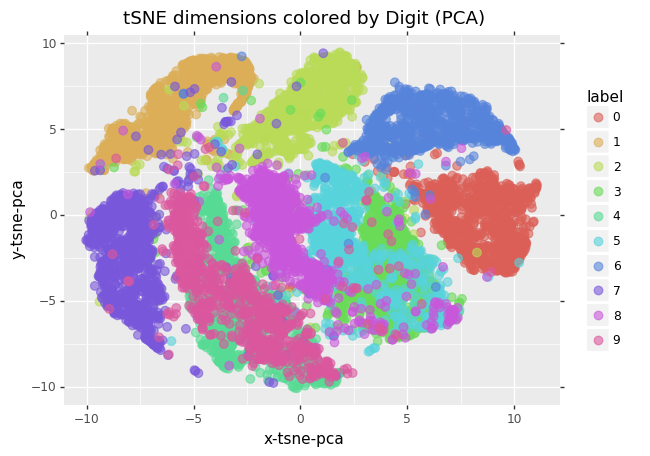

<ggplot: (-9223371936096833399)>

In [23]:
df_tsne = None
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne-pca', y='y-tsne-pca', color='label') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("tSNE dimensions colored by Digit (PCA)")
chart